In [3]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters, measure

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.134.1762810675.1868.1068286415.435
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 0.0.0.0
(0002,0013) Implementation Version Name         SH: 'NOTSPECIFIED'
(0002,0016) Source Application Entity Title     AE: 'NOTSPECIFIED'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008,0012) Instance Creation Date              DA: '20031108'
(0008,0013) Instance Creation Time              TM: '122956'
(0008,0014) Instance Creator UID                UI: 0.0.0.0
(

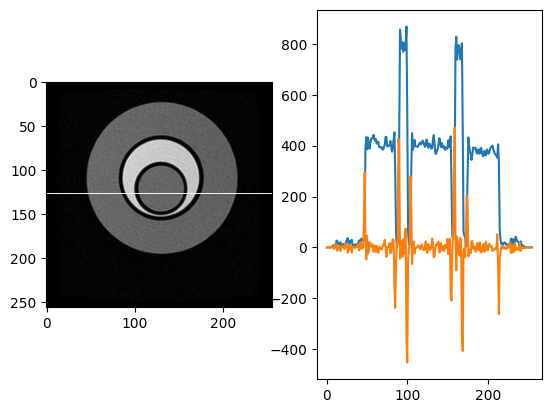

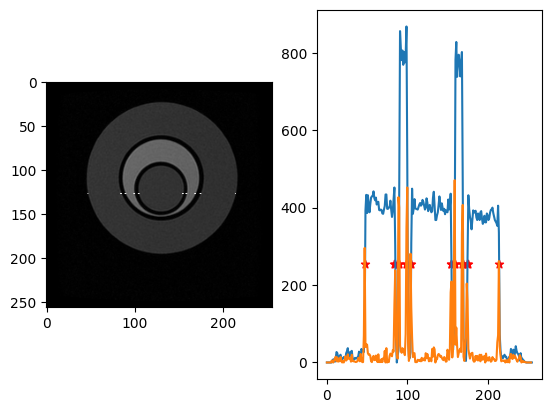

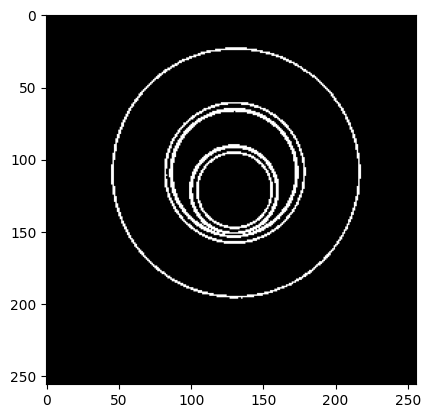

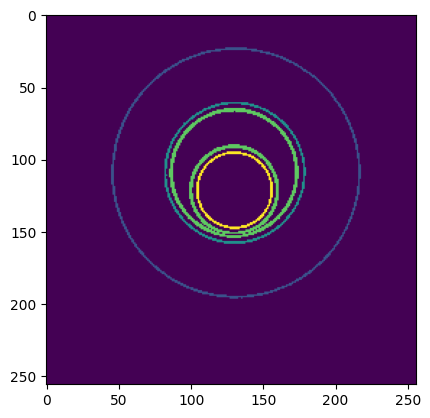

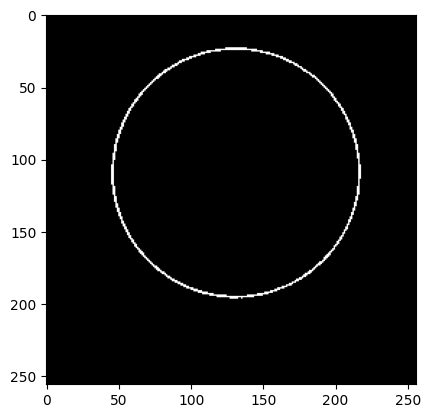

In [4]:
# load image
ds = pydicom.dcmread("../data/phantom.dcm")
image = ds.pixel_array
print(ds)

# display phantom
tmp = image.copy()
tmp[127,:] = 1000
fig, axes = plt.subplots(1,2)
axes[0].imshow(tmp, cmap = "gray")

# display profile and profile derivative
profile = image[127,:]
deriv = np.diff(profile)
axes[1].plot(profile)
axes[1].plot(deriv)
plt.show()

# find tissue changes
tmp = image.copy()
T = 100 # derivative threshold
idx = np.argwhere(np.abs(deriv) > T) 
cont = 255*np.ones(len(profile))
x = np.arange(0,len(profile))
cont = cont[idx]
x = x[idx]
tmp[127,idx]=2000
fig, axes = plt.subplots(1,2)
axes[0].imshow(tmp, cmap = "gray")
axes[1].plot(profile)
axes[1].plot(np.abs(deriv))
axes[1].scatter(x, cont, marker = "*", color = "red")
plt.show()

# working in 2d space by edge function
fig, axes = plt.subplots()
edge_map = filters.sobel(image)>0.005
plt.imshow(edge_map, cmap = "gray")
plt.show()

# create contours from edge map
fig, axes = plt.subplots()
labeled_image = measure.label(edge_map, connectivity=2) 
plt.imshow(labeled_image)
plt.show()

fig, axes = plt.subplots()
idx = np.where(labeled_image == 1)
mask = np.zeros(image.shape)
mask[idx]=1
plt.imshow(mask, cmap = "gray")
plt.show()